In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
def predict(H,X1,X2):
    # 预测结果
    # 仅X1和X2两个特征,X1和X2同维度
    X=np.c_[X1.reshape(-1,1),X2.reshape(-1,1)]
    Y_pre=np.zeros(len(X))
    for h in H:
        Y_pre+=h.predict(X)
    Y_pre=2*(Y_pre>=0)-1
    Y_pre=Y_pre.reshape(X1.shape)
    return Y_pre

In [3]:
#>>>>>西瓜数据集3.0α
X=np.array([[0.697,0.46],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],
   [0.403,0.237],[0.481,0.149],[0.437,0.211],[0.666,0.091],[0.243,0.267],
   [0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.36,0.37],
   [0.593,0.042],[0.719,0.103]])
Y=np.array([1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1])

In [4]:
#>>>>>Bagging
T=20
H=[]       #存储各个决策树桩，每行表示#划分特征,划分点,左枝取值，右枝取值
m=len(Y)
H_pre=np.zeros(m)  #存储每次迭代后H对于训练集的预测结果
error=[]           #存储每次迭代后H的训练误差
for t in range(T):
    boot_strap_sampling=np.random.randint(0,m,m)#随机抽取m个样本
    Xbs=X[boot_strap_sampling]
    Ybs=Y[boot_strap_sampling]
    h=tree.DecisionTreeClassifier().fit(Xbs,Ybs)
    H.append(h)
    # 计算并存储当前步的训练误差
    H_pre+=h.predict(X)
    Y_pre=(H_pre>=0)*2-1
    error.append(sum(Y_pre!=Y)/m)

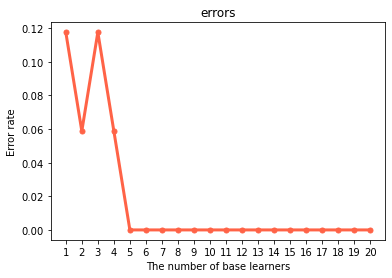

In [5]:
#>>>>>绘制训练误差变化曲线
plt.title('errors')
x=[]
for i in range(1,T+1):
    x.append(str(i))
plt.plot(x,error,'o-',color='tomato',markersize=5,linewidth=3)
plt.xlabel('The number of base learners')
plt.ylabel('Error rate')
plt.show()

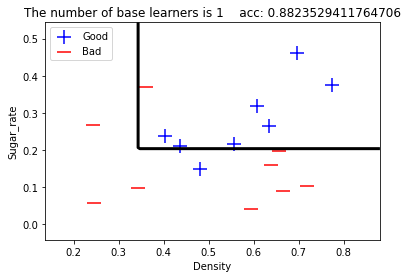

acc： 0.8823529411764706


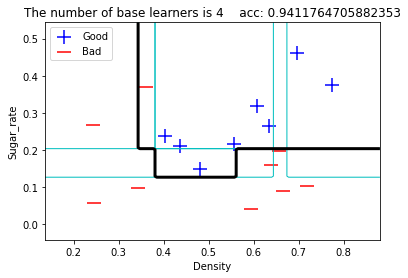

acc： 0.9411764705882353


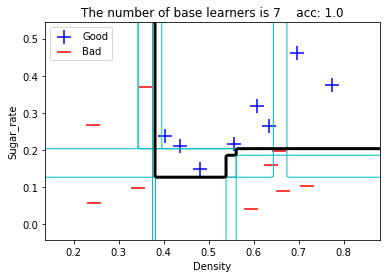

acc： 1.0


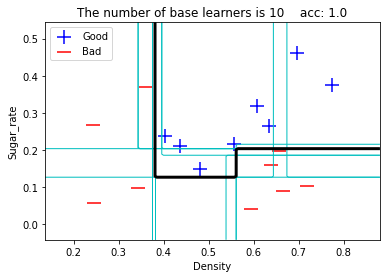

acc： 1.0


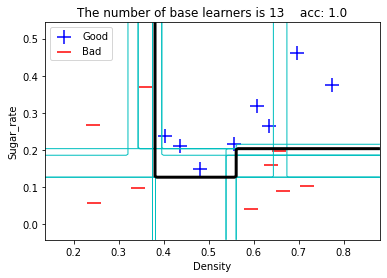

acc： 1.0


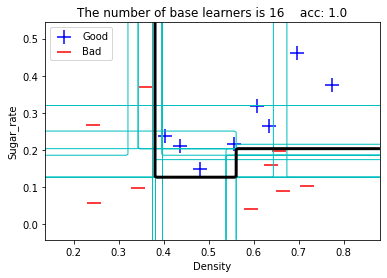

acc： 1.0


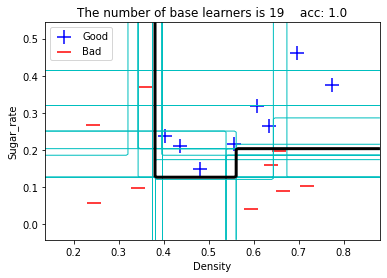

acc： 1.0


In [6]:
#>>>>>观察结果
x1min,x1max=X[:,0].min(),X[:,0].max()
x2min,x2max=X[:,1].min(),X[:,1].max()
x1=np.linspace(x1min-(x1max-x1min)*0.2,x1max+(x1max-x1min)*0.2,100)
x2=np.linspace(x2min-(x2max-x2min)*0.2,x2max+(x2max-x2min)*0.2,100)
X1,X2=np.meshgrid(x1,x2)

for t in range(1,T+1,3):
    H_pre=0
    for h in H[:t]:
        H_pre+=h.predict(X)
        Y_pre=(H_pre>=0)*2-1
    acc=sum(Y_pre==Y)/m
    plt.title('The number of base learners is '+str(t)+'    acc: '+str(acc))
    plt.xlabel('Density')
    plt.ylabel('Sugar_rate')
    # 画样本数据点
    plt.scatter(X[Y==1,0],X[Y==1,1],marker='+',c='b',s=200,label='Good')
    plt.scatter(X[Y==-1,0],X[Y==-1,1],marker='_',c='r',s=200,label='Bad')
    plt.legend(loc='upper left')
    # 画基学习器划分边界
    for i in range(t):
        #由于sklearn.tree类中将决策树的结构参数封装于内部，
        #不方便提取，这里采用一个笨办法：
        #用predict方法对区域内所有数据点(100×100)进行预测，
        #然后再用plt.contour的方法来找出划分边界
        Ypre=predict([H[i]],X1,X2)
        plt.contour(X1,X2,Ypre,colors='c',linewidths=1,levels=[0])
    # 画集成学习器划分边界
    Ypre=predict(H[:t],X1,X2)
    
    plt.contour(X1,X2,Ypre,colors='k',linewidths=3,levels=[0])
    plt.show()
    # H_pre=0
    # for h in H[:t]:
    #     H_pre+=h.predict(X)
    #     Y_pre=(H_pre>=0)*2-1
    # acc=sum(Y_pre==Y)/m
    print('acc：',acc)